# Project 1
---



### Proposal:

- To analyze the correlation of different health and societal 
makeup measurements across the world's largest countries with mortality rates 
to see which has the strongest impact. We plan to determine if there is a
significant difference across the 10 largest nations between mortality rates of
males and females. We plan to also determine and plot correlation between
mortality rates and national obesity, physicians per 1000 people, and national
population size. 

### Hypotheses:

- We hypothesize that females have a lower mortality rate than males,
that obesity is strongly correlated with mortality rate, that physicians per citizens
is strongly negatively correlated with mortality rate, and that larger nations have
higher mortality rates.

## Setup
--------

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Import master data file
master_data_df = pd.read_csv("data.csv")
master_data_df.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Limit years for cleaned data to 2006-2015
cleaned_data_df = master_data_df [["Country Name", "Indicator Name", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015"]]

# Limit countries for cleaned data to 10 largest in the world
cleaned_data_df = cleaned_data_df .loc[(cleaned_data_df ["Country Name"] == "China") |
                     (cleaned_data_df ["Country Name"] == "India") |
                     (cleaned_data_df ["Country Name"] == "United States") |
                     (cleaned_data_df ["Country Name"] == "Indonesia") |
                     (cleaned_data_df ["Country Name"] == "Brazil") |
                     (cleaned_data_df ["Country Name"] == "Pakistan") |
                     (cleaned_data_df ["Country Name"] == "Nigeria") |
                     (cleaned_data_df ["Country Name"] == "Bangladesh") |
                     (cleaned_data_df ["Country Name"] == "Russian Federation") |
                     (cleaned_data_df ["Country Name"] == "Mexico")
                     , :]

# Limit indicators to those relevant for planned analysis
cleaned_data_df = cleaned_data_df .loc[(cleaned_data_df ["Indicator Name"] == "Mortality rate, adult, male (per 1,000 male adults)") |
                     (cleaned_data_df ["Indicator Name"] == "Mortality rate, adult, female (per 1,000 female adults)") |
                     (cleaned_data_df ["Indicator Name"] == "Population, total") |
                     (cleaned_data_df ["Indicator Name"] == "Population, male") |
                     (cleaned_data_df ["Indicator Name"] == "Population, female") |
                     (cleaned_data_df ["Indicator Name"] == "Urban population") |
                     (cleaned_data_df ["Indicator Name"] == "Rural population") |
                     (cleaned_data_df ["Indicator Name"] == "Physicians (per 1,000 people)") |
                     (cleaned_data_df ["Indicator Name"] == "Prevalence of overweight (% of adults)") |
                     (cleaned_data_df ["Indicator Name"] == "Prevalence of overweight, male (% of male adults)") |
                     (cleaned_data_df ["Indicator Name"] == "Prevalence of overweight, female (% of female adults)")
                     , :]

# Display cleaned dataframe
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
19505,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",135.856,131.575,127.94,124.306,120.672,117.038,113.403,110.296,107.188,NaN


In [4]:
# Sorting dataframe
cleaned_data_df = cleaned_data_df.reset_index(drop=True)
cleaned_data_df.index.name = "Index"
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Index,,,,,,,,,,,,
0,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",135.856,131.575,127.94,124.306,120.672,117.038,113.403,110.296,107.188,NaN


In [5]:
column_averages = cleaned_data_df[["2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"]].mean(axis = 1, skipna = True)
column_averages_df = pd.DataFrame(column_averages)
column_averages_df=column_averages_df.rename(columns = {0:"2006-2015 AVG"})
column_averages_df.index.name = "Index"
column_averages_df.head(1)

,2006-2015 AVG
Index,
0,120.919333


In [6]:
cleaned_data_df = pd.merge(cleaned_data_df,column_averages_df, on = "Index", how = "inner")
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2006-2015 AVG
Index,,,,,,,,,,,,,
0,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",135.856,131.575,127.94,124.306,120.672,117.038,113.403,110.296,107.188,NaN,120.919333


In [7]:
cleaned_data_df = cleaned_data_df [["Country Name","Indicator Name", "2006-2015 AVG"]]
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
Index,,,
0,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",120.919333


In [8]:
# Calculate Total Average Mortality Rates
countries = cleaned_data_df["Country Name"].unique().astype(str)
country_list = []
total_avg_mort = []
for country in countries:

    country_df = cleaned_data_df.loc[cleaned_data_df["Country Name"] == country, :]
    total_mort = country_df.loc[(country_df["Indicator Name"] == "Mortality rate, adult, male (per 1,000 male adults)") | (country_df["Indicator Name"] == "Mortality rate, adult, female (per 1,000 female adults)") , "2006-2015 AVG"].sum()
    
    country_list.append(country)
    total_avg_mort.append(total_mort)


In [9]:
# Create Dataframe for Total Average Mortality Rates
total_avg_mort_df = pd.DataFrame({
    "Country Name" : country_list,
    "Indicator Name" : "Mortality Rate, Total",
    "2006-2015 AVG" : total_avg_mort,
    })
total_avg_mort_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",280.015889


In [10]:
# Combine cleaned_data_df and total_avg_mort_df
cleaned_data_df = pd.concat([total_avg_mort_df,cleaned_data_df],ignore_index=True)
cleaned_data_df

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",2.800159e+02
1,Brazil,"Mortality Rate, Total",3.080899e+02
2,China,"Mortality Rate, Total",1.826766e+02
3,India,"Mortality Rate, Total",3.860592e+02
4,Indonesia,"Mortality Rate, Total",3.672831e+02
...,...,...,...
115,United States,Prevalence of overweight (% of adults),6.640000e+01
116,United States,"Prevalence of overweight, female (% of female ...",6.170000e+01
117,United States,"Prevalence of overweight, male (% of male adults)",7.120000e+01
118,United States,Rural population,5.935318e+07


In [11]:
# Sort data
cleaned_data_df = cleaned_data_df.sort_values(["Country Name", "Indicator Name"], ascending =True)
cleaned_data_df = cleaned_data_df.reset_index(drop=True)
cleaned_data_df

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",2.800159e+02
1,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",1.209193e+02
2,Bangladesh,"Mortality rate, adult, male (per 1,000 male ad...",1.590966e+02
3,Bangladesh,"Physicians (per 1,000 people)",3.137500e-01
4,Bangladesh,"Population, female",7.543719e+07
...,...,...,...
115,United States,Prevalence of overweight (% of adults),6.640000e+01
116,United States,"Prevalence of overweight, female (% of female ...",6.170000e+01
117,United States,"Prevalence of overweight, male (% of male adults)",7.120000e+01
118,United States,Rural population,5.935318e+07


In [12]:
# Export cleaned data to CSV
cleaned_data_df.to_csv("cleaned_data.csv", index=False)

In [13]:
# Read cleaned data csv
final_cleaned_df = pd.read_csv("cleaned_data.csv")
final_cleaned_df

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",2.800159e+02
1,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",1.209193e+02
2,Bangladesh,"Mortality rate, adult, male (per 1,000 male ad...",1.590966e+02
3,Bangladesh,"Physicians (per 1,000 people)",3.137500e-01
4,Bangladesh,"Population, female",7.543719e+07
...,...,...,...
115,United States,Prevalence of overweight (% of adults),6.640000e+01
116,United States,"Prevalence of overweight, female (% of female ...",6.170000e+01
117,United States,"Prevalence of overweight, male (% of male adults)",7.120000e+01
118,United States,Rural population,5.935318e+07


## Data Analysis
--------

#### Mortality Rate and Sex
--------

In [14]:
# Create bar chart with mortality rate as y-axis and each of the sexes as a bar across all nations

#### Analysis

- Here is where the analysis will be.

#### Mortality Rate and Urbanization
--------

In [15]:
# Create bar chart with mortality rate as y-axis and urban and rural populations as bars across all nations

In [16]:
# Create dataframe to run visualization on
urban_df = final_cleaned_df.loc[(final_cleaned_df["Indicator Name"] == "Mortality Rate, Total") |
(final_cleaned_df["Indicator Name"] == "Rural population") |
(final_cleaned_df["Indicator Name"] == "Urban population") |
(final_cleaned_df["Indicator Name"] == "Population, total")
,:]
urban_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",280.015889


In [17]:
# Create country column
countires =[]
countries = urban_df["Country Name"].unique().astype(str)
sorted_urban_df = pd.DataFrame(countries)
sorted_urban_df=sorted_urban_df.rename(columns = {0:"Country"})
sorted_urban_df.index.name = "Index"
sorted_urban_df.head(1)

,Country
Index,
0,Bangladesh


In [18]:
# Create mortality column
mort_rates = urban_df.loc[urban_df["Indicator Name"] == "Mortality Rate, Total", '2006-2015 AVG']

mort_rates_df = pd.DataFrame(mort_rates)
mort_rates_df = mort_rates_df.reset_index(drop=True)
mort_rates_df = mort_rates_df.rename(columns = {"2006-2015 AVG":"Average Mortality Rate (Per 1,000 Adults)"})
mort_rates_df.index.name = "Index"
mort_rates_df.head(1)

,"Average Mortality Rate (Per 1,000 Adults)"
Index,
0,280.015889


In [19]:
# Create total population column
total_pop = urban_df.loc[urban_df["Indicator Name"] == "Population, total", '2006-2015 AVG']

total_pop_df = pd.DataFrame(total_pop)
total_pop_df = total_pop_df.reset_index(drop=True)
total_pop_df = total_pop_df.rename(columns = {"2006-2015 AVG":"Average Total Population"})
total_pop_df.index.name = "Index"
total_pop_df.head(1)

,Average Total Population
Index,
0,152710055.9


In [20]:
# Create urban population column
urban_pop = urban_df.loc[urban_df["Indicator Name"] == "Urban population", '2006-2015 AVG']

urban_pop_df = pd.DataFrame(urban_pop)
urban_pop_df = urban_pop_df.reset_index(drop=True)
urban_pop_df = urban_pop_df.rename(columns = {"2006-2015 AVG":"Average Urban Population"})
urban_pop_df.index.name = "Index"
urban_pop_df.head(1)

,Average Urban Population
Index,
0,47245799.0


In [21]:
# Create rural population column
rural_pop = urban_df.loc[urban_df["Indicator Name"] == "Rural population", '2006-2015 AVG']

rural_pop_df = pd.DataFrame(rural_pop)
rural_pop_df = rural_pop_df.reset_index(drop=True)
rural_pop_df = rural_pop_df.rename(columns = {"2006-2015 AVG":"Average Rural Population"})
rural_pop_df.index.name = "Index"
rural_pop_df.head(1)

,Average Rural Population
Index,
0,105464256.9


In [22]:
# Combine colums into sorted_urban_df
sorted_urban_df = pd.merge(sorted_urban_df,mort_rates_df, on = "Index", how = "inner")
sorted_urban_df = pd.merge(sorted_urban_df,total_pop_df, on = "Index", how = "inner")
sorted_urban_df = pd.merge(sorted_urban_df,urban_pop_df, on = "Index", how = "inner")
sorted_urban_df = pd.merge(sorted_urban_df,rural_pop_df, on = "Index", how = "inner")
sorted_urban_df

,Country,"Average Mortality Rate (Per 1,000 Adults)",Average Total Population,Average Urban Population,Average Rural Population
Index,,,,,
0,Bangladesh,280.015889,1.527101e+08,47245799.0,105464256.9
1,Brazil,308.089889,1.994672e+08,168501323.0,30965870.5
2,China,182.676556,1.341022e+09,669038662.6,671983337.4
3,India,386.059222,1.238089e+09,385836981.2,852251751.3
4,Indonesia,367.283111,2.433133e+08,122549324.5,120763959.7
5,Mexico,235.128000,1.193508e+08,93082217.3,26268543.3
6,Nigeria,750.853444,1.620724e+08,71451889.1,90620472.9
7,Pakistan,339.226111,1.722177e+08,63582814.5,108634930.8
8,Russian Federation,539.344200,1.431818e+08,105566957.5,37614801.8


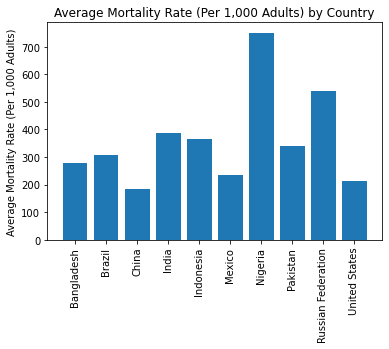

In [23]:
# Plot Average Mortality Rate by Country
x_values = sorted_urban_df["Country"]
y_values = sorted_urban_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.bar(x_values,y_values)
plt.title ("Average Mortality Rate (Per 1,000 Adults) by Country")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.xticks(x_values,x_values, rotation=90)

# Save the figure
plt.savefig("output_figs/Mort_by_Country.png")

# Display the figure
plt.show()

#### Analysis:

Goal - To analyze the average mortality rates across the world's 10 largest countries.

Findings- Nigera and the Russian Federation had significantly larger mortality rates than the other 8 countries, beating the next highest by over 300 and 100 deaths per 1,000 adults, respectively.

Further Analysis- Further analysis could be done to determine if there were any significant events/diseases between 2006 and 2015 in these countries that could explain this significant difference.


-----------------

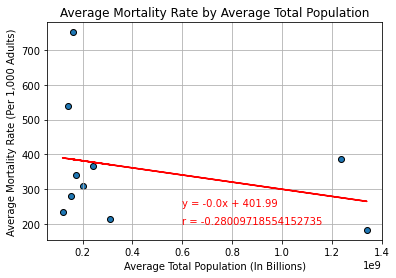

In [24]:
# Plot Average Mortality Rate by Average Total Population
x_values = sorted_urban_df["Average Total Population"]
y_values = sorted_urban_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Average Total Population")
plt.xlabel ("Average Total Population (In Billions)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(600000000,250),color="red")
plt.annotate(f'r = {rvalue}',(600000000, 200),color="r")

# Save the figure
plt.savefig("output_figs/Mort_by_Avg_Total_Pop.png")

# Display the figure
plt.show()

#### Analysis:

Goal - 

Findings- 

Further Analysis- 

-----------------

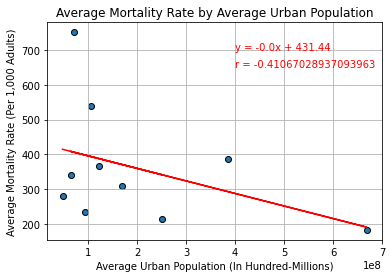

In [25]:
# Plot Average Mortality Rate by Average Urban Population
x_values = sorted_urban_df["Average Urban Population"]
y_values = sorted_urban_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Average Urban Population")
plt.xlabel ("Average Urban Population (In Hundred-Millions)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(400000000,700),color="red")
plt.annotate(f'r = {rvalue}',(400000000, 650),color="r")

# Save the figure
plt.savefig("output_figs/Mort_by_Avg_Urban_Pop.png")

# Display the figure
plt.show()

#### Analysis:

Goal - 

Findings- 

Further Analysis- 

-----------------

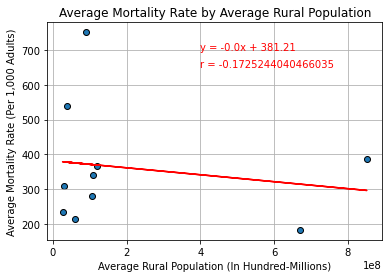

In [26]:
# Plot Average Mortality Rate by Average Rural Population
x_values = sorted_urban_df["Average Rural Population"]
y_values = sorted_urban_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Average Rural Population")
plt.xlabel ("Average Rural Population (In Hundred-Millions)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(400000000,700),color="red")
plt.annotate(f'r = {rvalue}',(400000000, 650),color="r")

# Save the figure
plt.savefig("output_figs/Mort_by_Avg_Rural_Pop.png")

# Display the figure
plt.show()

#### Analysis:

Goal - 

Findings- 

Further Analysis- 

-----------------

#### Mortality Rate and Access to Physicians
--------

In [27]:
# Create scatterplot with mortality rate as y-axis and pysicians (per 1000 people) as the x-axis across all nations

In [39]:
# Create dataframe to run visualization on
doctor_df = final_cleaned_df.loc[(final_cleaned_df["Indicator Name"] == "Mortality Rate, Total") |
(final_cleaned_df["Indicator Name"] == "Physicians (per 1,000 people)") |
(final_cleaned_df["Indicator Name"] == "Population, total")
,:]
doctor_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",280.015889


In [40]:
# Create country column
countires =[]
countries = doctor_df["Country Name"].unique().astype(str)
sorted_doctor_df = pd.DataFrame(countries)
sorted_doctor_df=sorted_doctor_df.rename(columns = {0:"Country"})
sorted_doctor_df.index.name = "Index"
sorted_doctor_df.head(1)

,Country
Index,
0,Bangladesh


In [41]:
# Create mortality column
mort_rates = doctor_df.loc[doctor_df["Indicator Name"] == "Mortality Rate, Total", '2006-2015 AVG']

doctor_mort_rates_df = pd.DataFrame(mort_rates)
doctor_mort_rates_df = doctor_mort_rates_df.reset_index(drop=True)
doctor_mort_rates_df = doctor_mort_rates_df.rename(columns = {"2006-2015 AVG":"Average Mortality Rate (Per 1,000 Adults)"})
doctor_mort_rates_df.index.name = "Index"
doctor_mort_rates_df.head(1)

,"Average Mortality Rate (Per 1,000 Adults)"
Index,
0,280.015889


In [42]:
# Create total population column
total_pop = doctor_df.loc[doctor_df["Indicator Name"] == "Population, total", '2006-2015 AVG']

doctor_total_pop_df = pd.DataFrame(total_pop)
doctor_total_pop_df = doctor_total_pop_df.reset_index(drop=True)
doctor_total_pop_df = doctor_total_pop_df.rename(columns = {"2006-2015 AVG":"Average Total Population"})
doctor_total_pop_df.index.name = "Index"
doctor_total_pop_df.head(1)

,Average Total Population
Index,
0,152710055.9


In [43]:
# Create Physician column
doctor_pop = doctor_df.loc[doctor_df["Indicator Name"] == "Physicians (per 1,000 people)", '2006-2015 AVG']

doctor_pop_df = pd.DataFrame(doctor_pop)
doctor_pop_df = doctor_pop_df.reset_index(drop=True)
doctor_pop_df = doctor_pop_df.rename(columns = {"2006-2015 AVG":"Physicians (per 1,000 people)"})
doctor_pop_df.index.name = "Index"
doctor_pop_df.head(1)

,"Physicians (per 1,000 people)"
Index,
0,0.31375


In [44]:
# Combine colums into sorted_doctor_df
sorted_doctor_df = pd.merge(sorted_doctor_df,doctor_mort_rates_df, on = "Index", how = "inner")
sorted_doctor_df = pd.merge(sorted_doctor_df,doctor_total_pop_df, on = "Index", how = "inner")
sorted_doctor_df = pd.merge(sorted_doctor_df,doctor_pop_df, on = "Index", how = "inner")
sorted_doctor_df

,Country,"Average Mortality Rate (Per 1,000 Adults)",Average Total Population,"Physicians (per 1,000 people)"
Index,,,,
0,Bangladesh,280.015889,1.527101e+08,0.313750
1,Brazil,308.089889,1.994672e+08,1.787143
2,China,182.676556,1.341022e+09,1.596000
3,India,386.059222,1.238089e+09,0.665143
4,Indonesia,367.283111,2.433133e+08,0.182600
5,Mexico,235.128000,1.193508e+08,1.953667
6,Nigeria,750.853444,1.620724e+08,0.395600
7,Pakistan,339.226111,1.722177e+08,0.803500
8,Russian Federation,539.344200,1.431818e+08,4.308950


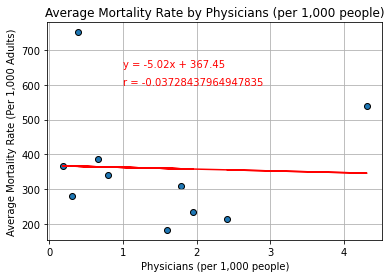

In [59]:
# Plot Average Mortality Rate by Physicians (per 1,000 people)
x_values = sorted_doctor_df["Physicians (per 1,000 people)"]
y_values = sorted_doctor_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Physicians (per 1,000 people)")
plt.xlabel ("Physicians (per 1,000 people)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(1,650),color="red")
plt.annotate(f'r = {rvalue}',(1, 600),color="r")

# Save the figure
plt.savefig("output_figs/Mort_by_Physicians_Total_Pop.png")

# Display the figure
plt.show()

#### Analysis:

Goal - 

Findings- 

Further Analysis- 

-----------------

#### Mortality Rate and Obesity
--------

In [29]:
# Create scatterplot with mortality rate as y-axis and prevalence of overweight (% of adults) as the x-axis across all nations

In [30]:
# Create dataframe to run visualization on
overweight_df = final_cleaned_df.loc[(final_cleaned_df["Indicator Name"] == "Mortality Rate, Total") |
(final_cleaned_df["Indicator Name"] == "Prevalence of overweight (% of adults)") |
(final_cleaned_df["Indicator Name"] == "Prevalence of overweight, female (% of female adults)") |
(final_cleaned_df["Indicator Name"] == "Prevalence of overweight, male (% of male adults)")
,:]
overweight_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",280.015889


In [31]:
# Create country column
countires =[]
countries = overweight_df["Country Name"].unique().astype(str)
sorted_overweight_df = pd.DataFrame(countries)
sorted_overweight_df=sorted_overweight_df.rename(columns = {0:"Country"})
sorted_overweight_df.index.name = "Index"
sorted_overweight_df.head(1)

,Country
Index,
0,Bangladesh


In [32]:
# Create mortality column
mort_rates = overweight_df.loc[overweight_df["Indicator Name"] == "Mortality Rate, Total", '2006-2015 AVG']
mort_rates_df = pd.DataFrame(mort_rates)
mort_rates_df = mort_rates_df.reset_index(drop=True)
mort_rates_df = mort_rates_df.rename(columns = {"2006-2015 AVG":"Average Mortality Rate (Per 1,000 Adults)"})
mort_rates_df.index.name = "Index"
mort_rates_df.head(1)

,"Average Mortality Rate (Per 1,000 Adults)"
Index,
0,280.015889


In [33]:
# Create prevelance of overweight (% of adults) column
tot_overweight = overweight_df.loc[overweight_df["Indicator Name"] == "Prevalence of overweight (% of adults)", '2006-2015 AVG']
tot_overweight_df = pd.DataFrame(tot_overweight)
tot_overweight_df = tot_overweight_df.reset_index(drop=True)
tot_overweight_df = tot_overweight_df.rename(columns = {"2006-2015 AVG":"Prevalence of overweight (% of adults)"})
tot_overweight_df.index.name = "Index"
tot_overweight_df.head(1)

,Prevalence of overweight (% of adults)
Index,
0,17.1


In [34]:
# Create prevalence of overweight, female (% of female adults) column
fem_overweight = overweight_df.loc[overweight_df["Indicator Name"] == "Prevalence of overweight, female (% of female adults)", '2006-2015 AVG']
fem_overweight_df = pd.DataFrame(fem_overweight)
fem_overweight_df = fem_overweight_df.reset_index(drop=True)
fem_overweight_df = fem_overweight_df.rename(columns = {"2006-2015 AVG":"Prevalence of overweight, female (% of female adults)"})
fem_overweight_df.index.name = "Index"
fem_overweight_df.head(1)

,"Prevalence of overweight, female (% of female adults)"
Index,
0,20.05


In [35]:
# Create prevalence of overweight, female (% of male adults) column
male_overweight = overweight_df.loc[overweight_df["Indicator Name"] == "Prevalence of overweight, male (% of male adults)", '2006-2015 AVG']
male_overweight_df = pd.DataFrame(male_overweight)
male_overweight_df = male_overweight_df.reset_index(drop=True)
male_overweight_df = male_overweight_df.rename(columns = {"2006-2015 AVG":"Prevalence of overweight, male (% of male adults)"})
male_overweight_df.index.name = "Index"
male_overweight_df.head(1)

,"Prevalence of overweight, male (% of male adults)"
Index,
0,14.25


In [36]:
# Combine colums into sorted_overweight_df
sorted_overweight_df = pd.merge(sorted_overweight_df,mort_rates_df, on = "Index", how = "inner")
sorted_overweight_df = pd.merge(sorted_overweight_df,tot_overweight_df, on = "Index", how = "inner")
sorted_overweight_df = pd.merge(sorted_overweight_df,fem_overweight_df, on = "Index", how = "inner")
sorted_overweight_df = pd.merge(sorted_overweight_df,male_overweight_df, on = "Index", how = "inner")
sorted_overweight_df

,Country,"Average Mortality Rate (Per 1,000 Adults)",Prevalence of overweight (% of adults),"Prevalence of overweight, female (% of female adults)","Prevalence of overweight, male (% of male adults)"
Index,,,,,
0,Bangladesh,280.015889,17.10,20.05,14.25
1,Brazil,308.089889,52.60,51.55,53.75
2,China,182.676556,32.25,30.70,33.65
3,India,386.059222,20.85,23.50,18.40
4,Indonesia,367.283111,22.85,26.80,18.95
5,Mexico,235.128000,63.25,64.60,61.75
6,Nigeria,750.853444,31.55,38.85,24.50
7,Pakistan,339.226111,22.10,24.30,20.00
8,Russian Federation,539.344200,57.55,56.20,59.05


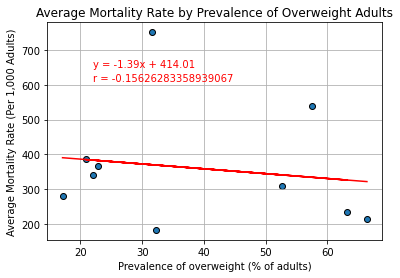

In [37]:
# Plot Average Mortality Rate by Prevalence of Overweight Adults
x_values = sorted_overweight_df["Prevalence of overweight (% of adults)"]
y_values = sorted_overweight_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Prevalence of Overweight Adults")
plt.xlabel ("Prevalence of overweight (% of adults)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(22,650),color="red")
plt.annotate(f'r = {rvalue}',(22,610),color="r")

# Save the figure
plt.savefig("output_figs/Mort_by_Overweight_Adults.png")

# Display the figure
plt.show()

#### Analysis:

Goal - 

Findings- 

Further Analysis- 

-----------------

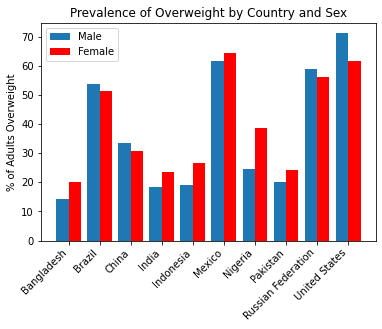

In [38]:
# Plot bar graph of overweight % by sex by country
x_values = sorted_overweight_df["Country"]
y1_values = sorted_overweight_df["Prevalence of overweight, male (% of male adults)"]
y2_values = sorted_overweight_df["Prevalence of overweight, female (% of female adults)"]
 
X_axis = np.arange(len(x_values))
 
plt.bar(X_axis - 0.2, y1_values, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, y2_values, 0.4, label = 'Female', color="r")
 
plt.xticks(X_axis, x_values,rotation=45, ha="right", va="top")
plt.ylabel("% of Adults Overweight")
plt.title("Prevalence of Overweight by Country and Sex")

plt.legend()

# Save the figure
plt.savefig("output_figs/Overweight_%_by_Sex_by_Country.png")

# Display the figure
plt.show()


#### Analysis:

Goal - 

Findings- 

Further Analysis- 

-----------------